In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("data_to_MF/smiles_list_all.csv")
made_by = pd.DataFrame(data['made_by'], columns=['made_by'])
data

,SMILES,made_by
0,C#Cc1cc(C)cc(Cc2ccc(-n3c4ccccc4c4ccccc43)cc2)c1,e=1-0.1
1,CN(C)c1ccc(-c2ccc(-c3ccc4c(c3)S(=O)(=O)c3ccccc...,e=1-0.1
2,c1ccc(-c2nc3ccc(-c4c5ncoc5cc5ncoc45)cc3o2)cc1,e=1-0.1
3,CN(C)c1ccc(-c2ccc(P(=O)(c3ccccc3)c3cccc(-c4cc5...,e=1-0.1
4,Cc1cc(-c2ccc3c(c2)Sc2ccccc2N3c2ccc(N(C)C)cc2)c...,e=1-0.1
...,...,...
101240,COC(C=C1)=CC=C1C2=CC(C3=CC=C(C=C3)OC)=CC(C4=CC...,real
101241,C[N+]1=C(C=CC=C2)C2=CC3=CC=CC=C31,real
101242,C[N+]1=C(C=CC=C2)C2=C(C3=CC=CC=C3)C4=CC=CC=C41,real
101243,C[N+]1=C(C=CC=C2)C2=C(C3=C(C=C(C=C3C)C)C)C4=CC...,real


In [3]:
mf_2 = []
for i in range(0, len(data)):
    mol_2 = Chem.MolFromSmiles(data["SMILES"][i])
    fp_2 = AllChem.GetMorganFingerprintAsBitVect(mol_2, 2, 2048)
    mf_2.append(np.array(fp_2, int))

df = pd.DataFrame(mf_2)
df = df.add_prefix('MF2_')
print(df.shape)
df

(101245, 2048)


,MF2_0,MF2_1,MF2_2,MF2_3,MF2_4,MF2_5,MF2_6,MF2_7,MF2_8,MF2_9,...,MF2_2038,MF2_2039,MF2_2040,MF2_2041,MF2_2042,MF2_2043,MF2_2044,MF2_2045,MF2_2046,MF2_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# UMAP
X = np.array(df)
reducer = umap.UMAP(random_state=42)
X_2d = reducer.fit_transform(X)
df_umap = pd.DataFrame(X_2d)
df_umap = df_umap.add_prefix('UMAP_')
df_umap

C:\Users\noton\miniconda3\envs\ReL\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_0,UMAP_1
0,12.018746,-4.184489
1,8.787278,7.045586
2,9.398496,2.228255
3,14.400101,2.651958
4,10.665436,-0.952803
...,...,...
101240,14.850677,0.863750
101241,14.301314,1.033270
101242,14.390387,1.010980
101243,14.415030,1.055494


In [5]:
df_umap = pd.concat([df_umap, made_by], axis=1, join='inner')
df_umap.head()

,UMAP_0,UMAP_1,made_by
0,12.018746,-4.184489,e=1-0.1
1,8.787278,7.045586,e=1-0.1
2,9.398496,2.228255,e=1-0.1
3,14.400101,2.651958,e=1-0.1
4,10.665436,-0.952803,e=1-0.1


In [6]:
MF_umap_human = df_umap[df_umap['made_by'] == 'human']
MF_umap_e1_01 = df_umap[df_umap['made_by'] == 'e=1-0.1']
MF_umap_e1 = df_umap[df_umap['made_by'] == 'e=1']
MF_umap_e01 = df_umap[df_umap['made_by'] == 'e=0.1']
MF_umap_real = df_umap[df_umap['made_by'] == 'real']

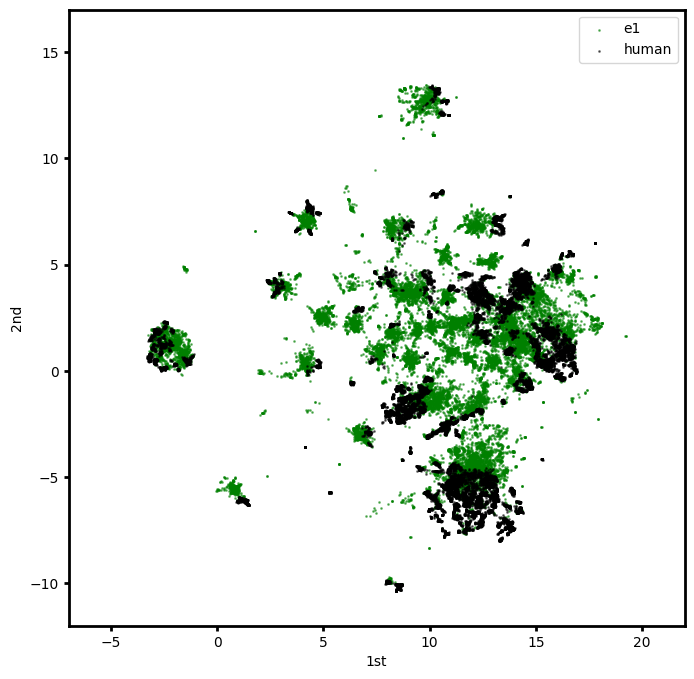

In [7]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=1, alpha=0.5)
plt.scatter(MF_umap_human['UMAP_0'], MF_umap_human['UMAP_1'], color='black', label='human', s=1, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-7, 22)
plt.ylim(-12, 17)
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()

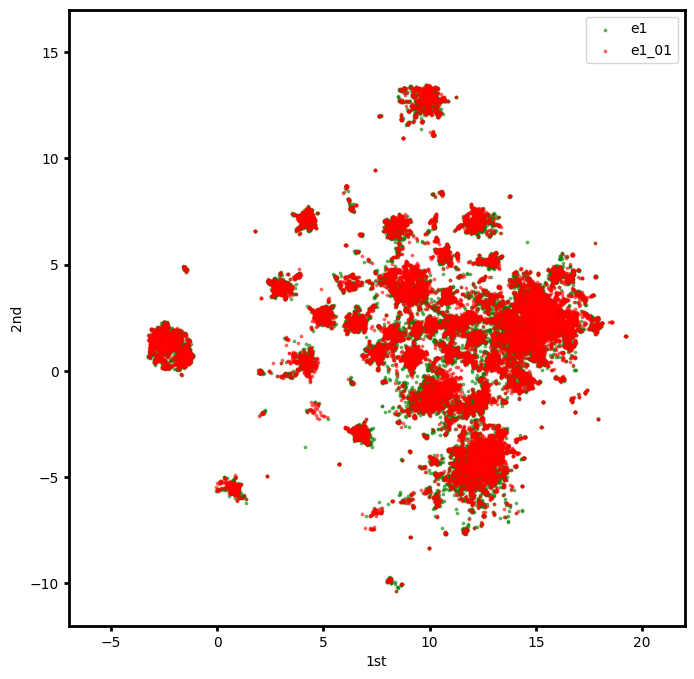

In [8]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=3, alpha=0.5)
plt.scatter(MF_umap_e1_01['UMAP_0'], MF_umap_e1_01['UMAP_1'], color='red', label='e1_01', s=3, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-7, 22)
plt.ylim(-12, 17)
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()

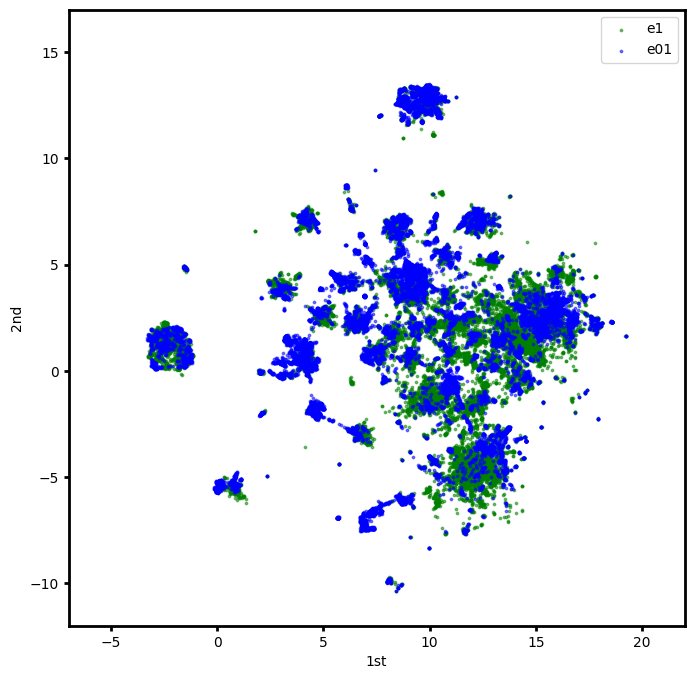

In [9]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=3, alpha=0.5)
plt.scatter(MF_umap_e01['UMAP_0'], MF_umap_e01['UMAP_1'], color='blue', label='e01', s=3, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-7, 22)
plt.ylim(-12, 17)
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()

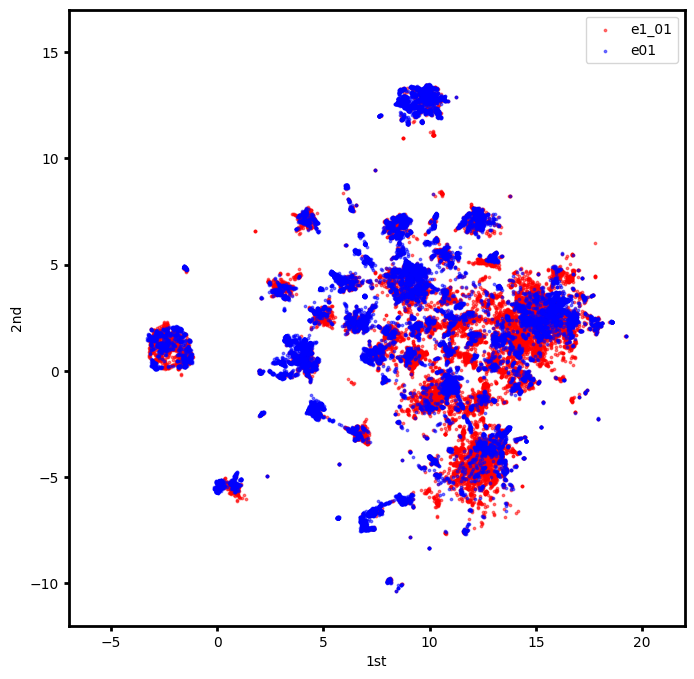

In [10]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1_01['UMAP_0'], MF_umap_e1_01['UMAP_1'], color='red', label='e1_01', s=3, alpha=0.5)
plt.scatter(MF_umap_e01['UMAP_0'], MF_umap_e01['UMAP_1'], color='blue', label='e01', s=3, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-7, 22)
plt.ylim(-12, 17)
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()

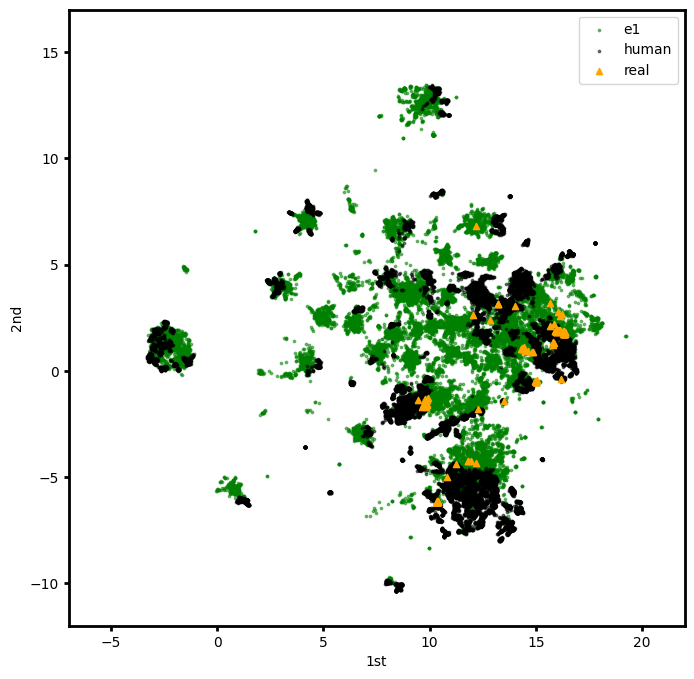

In [11]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=3, alpha=0.5)
plt.scatter(MF_umap_human['UMAP_0'], MF_umap_human['UMAP_1'], color='black', label='human', s=3, alpha=0.5)
plt.scatter(MF_umap_real['UMAP_0'], MF_umap_real['UMAP_1'], color='orange', label='real', marker='^', s=20)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-7, 22)
plt.ylim(-12, 17)
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()

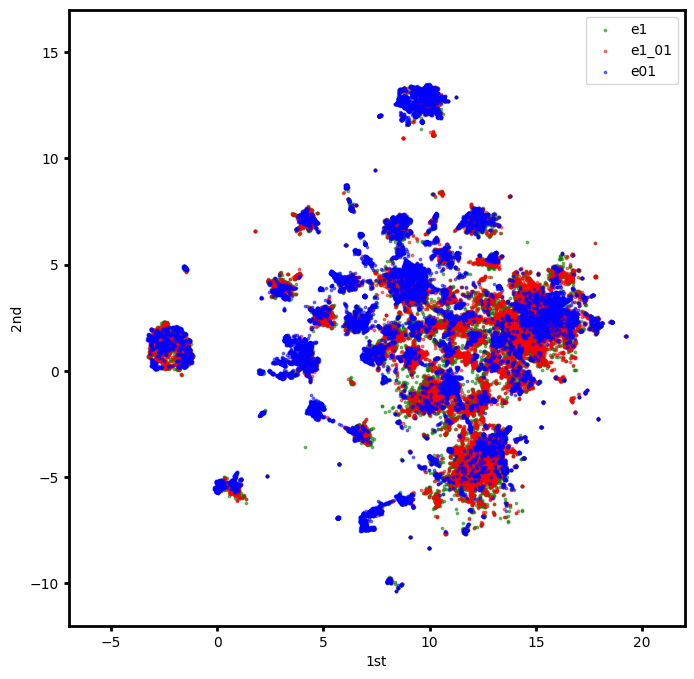

In [12]:
fig = plt.figure(figsize=(8,8))
plt.scatter(MF_umap_e1['UMAP_0'], MF_umap_e1['UMAP_1'], color='green', label='e1', s=3, alpha=0.5)
plt.scatter(MF_umap_e1_01['UMAP_0'], MF_umap_e1_01['UMAP_1'], color='red', label='e1_01', s=3, alpha=0.5)
plt.scatter(MF_umap_e01['UMAP_0'], MF_umap_e01['UMAP_1'], color='blue', label='e01', s=3, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-7, 22)
plt.ylim(-12, 17)
plt.gca().set_aspect('equal')
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(2)
ax.tick_params(width=2)
plt.legend() 
plt.show()

In [13]:
# TSNE
X = np.array(df)
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_2d)
df_tsne = df_tsne.add_prefix('TSNE_')
df_tsne

,TSNE_0,TSNE_1
0,4.437226,-70.747353
1,54.202091,18.791033
2,11.856627,58.006523
3,-4.740285,-17.332232
4,35.798721,-38.613113
...,...,...
101240,-17.290512,-9.790919
101241,-17.403757,-10.971392
101242,-17.284691,-10.938736
101243,-17.468513,-10.976965


In [14]:
df_tsne = pd.concat([df_tsne, made_by], axis=1, join='inner')
df_tsne.head()

,TSNE_0,TSNE_1,made_by
0,4.437226,-70.747353,e=1-0.1
1,54.202091,18.791033,e=1-0.1
2,11.856627,58.006523,e=1-0.1
3,-4.740285,-17.332232,e=1-0.1
4,35.798721,-38.613113,e=1-0.1


In [15]:
MF_tsne_human = df_tsne[df_tsne['made_by'] == 'human']
MF_tsne_e1_01 = df_tsne[df_tsne['made_by'] == 'e=1-0.1']
MF_tsne_e1 = df_tsne[df_tsne['made_by'] == 'e=1']
MF_tsne_e01 = df_tsne[df_tsne['made_by'] == 'e=0.1']
MF_tsne_real = df_tsne[df_umap['made_by'] == 'real']

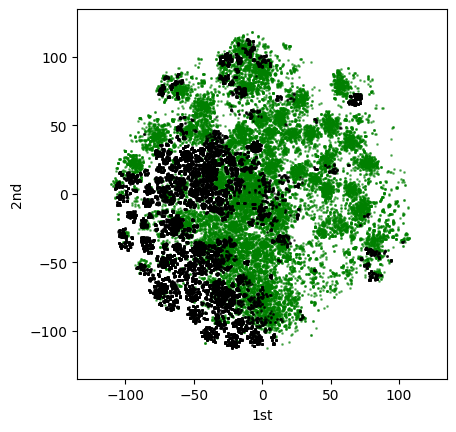

In [16]:
fig = plt.figure()
plt.scatter(MF_tsne_e1['TSNE_0'], MF_tsne_e1['TSNE_1'], color='green', label='e1', s=1, alpha=0.5)
plt.scatter(MF_tsne_human['TSNE_0'], MF_tsne_human['TSNE_1'], color='black', label='human', s=1, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.gca().set_aspect('equal')
plt.show()

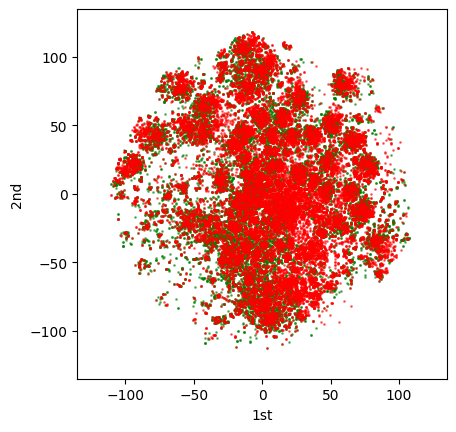

In [17]:
fig = plt.figure()
plt.scatter(MF_tsne_e1['TSNE_0'], MF_tsne_e1['TSNE_1'], color='green', label='e1', s=1, alpha=0.5)
plt.scatter(MF_tsne_e1_01['TSNE_0'], MF_tsne_e1_01['TSNE_1'], color='red', label='e1_01', s=1, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.gca().set_aspect('equal')
plt.show()

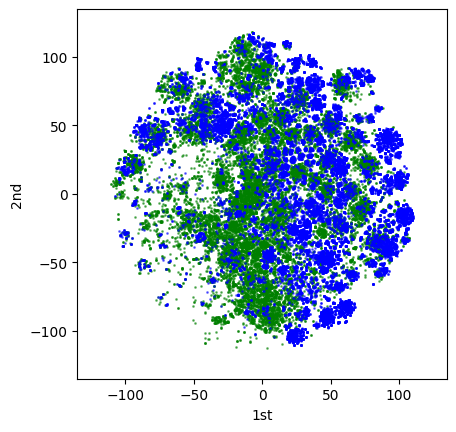

In [18]:
fig = plt.figure()
plt.scatter(MF_tsne_e1['TSNE_0'], MF_tsne_e1['TSNE_1'], color='green', label='e1', s=1, alpha=0.5)
plt.scatter(MF_tsne_e01['TSNE_0'], MF_tsne_e01['TSNE_1'], color='blue', label='e01', s=1, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.gca().set_aspect('equal')
plt.show()

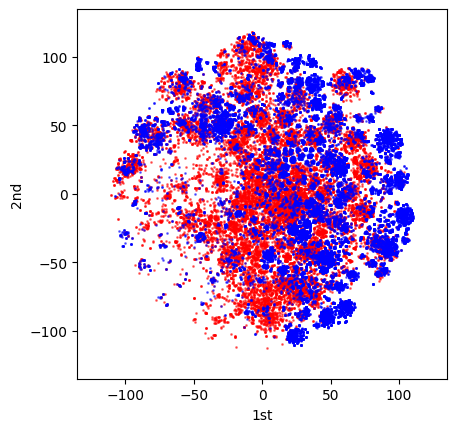

In [19]:
fig = plt.figure()
plt.scatter(MF_tsne_e1_01['TSNE_0'], MF_tsne_e1_01['TSNE_1'], color='red', label='e1_01', s=1, alpha=0.5)
plt.scatter(MF_tsne_e01['TSNE_0'], MF_tsne_e01['TSNE_1'], color='blue', label='e01', s=1, alpha=0.5)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.gca().set_aspect('equal')
plt.show()

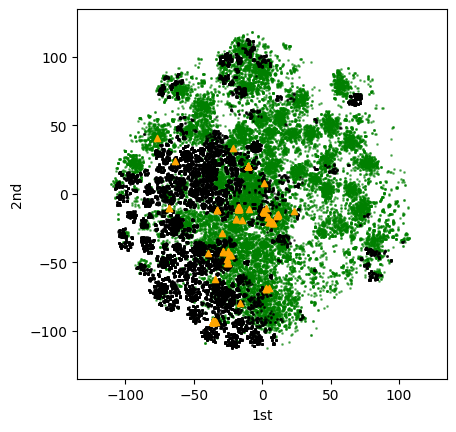

In [20]:
fig = plt.figure()
plt.scatter(MF_tsne_e1['TSNE_0'], MF_tsne_e1['TSNE_1'], color='green', label='e1', s=1, alpha=0.5)
plt.scatter(MF_tsne_human['TSNE_0'], MF_tsne_human['TSNE_1'], color='black', label='human', s=1, alpha=0.5)
plt.scatter(MF_tsne_real['TSNE_0'], MF_tsne_real['TSNE_1'], color='orange', label='real', marker='^', s=20)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.gca().set_aspect('equal')
plt.show()

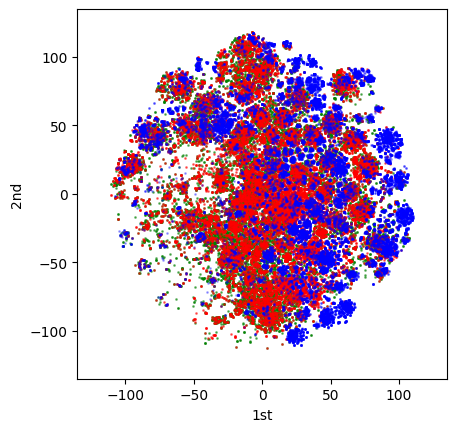

In [21]:
fig = plt.figure()
plt.scatter(MF_tsne_e1['TSNE_0'], MF_tsne_e1['TSNE_1'], color='green', label='e1', s=1, alpha=0.5)
plt.scatter(MF_tsne_e1_01['TSNE_0'], MF_tsne_e1_01['TSNE_1'], color='red', label='e1_01', s=1, alpha=0.5)
plt.scatter(MF_tsne_e01['TSNE_0'], MF_tsne_e01['TSNE_1'], color='blue', label='e01', s=1, alpha=0.3)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.xlim(-135, 135)
plt.ylim(-135, 135)
plt.gca().set_aspect('equal')
plt.show()